In [57]:
library(ggplot2)
library(ggthemes)

In [58]:
col_DA = "#2ca02c"
col_Sert = "#98df8a"

In [62]:
mypalette = "Warm and cool"
col_D30 = canva_pal(mypalette)(4)[3]
col_D52 = canva_pal(mypalette)(4)[1]
col_D52_ROT = canva_pal(mypalette)(4)[2]

In [44]:
### day30
nmi_0 = readRDS("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/neuMat/nmi_neurons_day30.Rds")

In [9]:
### day52 none
nmi_1 = readRDS("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/neuMat/nmi_neurons_day52_none.Rds")

In [32]:
### day52 rot
nmi_2 = readRDS("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/neuMat/nmi_neurons_day52_rot.Rds")

In [10]:
# overall: NMI-all, 
# discriminable: NMI-discriminable (based on discrim. modules only ) 
# activity: Neuron Activity Index (NAI, this maybe what in the paper is called NFI; F=functionality)

In [46]:
df_nmi_0 = nmi_0$overallNMI
df_nmi_0$time_point = "Day30"
head(df_nmi_0)

,overall,discriminable,activity,celltype,treatment,time_point
GTCGGGTCATGTCGAT-1-19,0.4728026,0.4439646,0.3068475,Sert,NONE,Day30
ACCAGTATCAAGAAGT-1-33,0.4822061,0.4555255,0.3546429,DA,NONE,Day30
TGGCCAGGTCTCTTTA-1-15,0.4841568,0.4690050,0.3002614,Sert,NONE,Day30
CTCACACCAGATAATG-1-26,0.4822049,0.4329310,0.2910879,Sert,NONE,Day30
CCCTCCTGTCAAGCGA-1-6,0.4931809,0.4764145,0.3114766,Sert,NONE,Day30
CGATGGCAGTGGTAGC-1-20,0.4893730,0.4609344,0.3057609,Sert,NONE,Day30


In [47]:
df_nmi_1 = nmi_1$overallNMI
df_nmi_1$time_point = "Day52"
head(df_nmi_1)

,overall,discriminable,activity,celltype,treatment,time_point
CTTAACTAGACTAAGT-1-20,0.5050777,0.5002210,0.3598966,Sert,NONE,Day52
CCGTACTTCAGGCAAG-1-34,0.4982950,0.4793651,0.3773424,DA,NONE,Day52
CTCGTCACACAGATTC-1-20,0.4702427,0.4406148,0.3208831,DA,NONE,Day52
AGTTGGTTCACTGGGC-1-25,0.5021916,0.4745941,0.3540892,DA,NONE,Day52
CTCTACGAGCGATGAC-1-61,0.5018521,0.4946106,0.3449746,Sert,NONE,Day52
GCAATCATCGATCCCT-1-4,0.4908949,0.4730399,0.3581989,Sert,NONE,Day52


In [48]:
df_nmi_2 = nmi_2$overallNMI
df_nmi_2$time_point = "Day52"
head(df_nmi_2)

,overall,discriminable,activity,celltype,treatment,time_point
CCTACACAGTACGCCC-1-36,0.5001735,0.4829309,0.3858580,DA,ROT,Day52
TAGAGCTCAAGCGAGT-1-58,0.4979538,0.4954870,0.3900825,DA,ROT,Day52
AAGGTTCGTTACGTCA-1-74,0.5027530,0.4807659,0.3643992,DA,ROT,Day52
GGACGTCAGATAGCAT-1-18,0.5210315,0.4954329,0.3618898,Sert,ROT,Day52
TCCCGATAGTATGACA-1-11,0.4941513,0.4724883,0.3298401,Sert,ROT,Day52
ACTATCTGTACAGTTC-1-30,0.5025687,0.4632365,0.3088261,Sert,ROT,Day52


In [49]:
df = rbind(df_nmi_0, df_nmi_1, df_nmi_2)

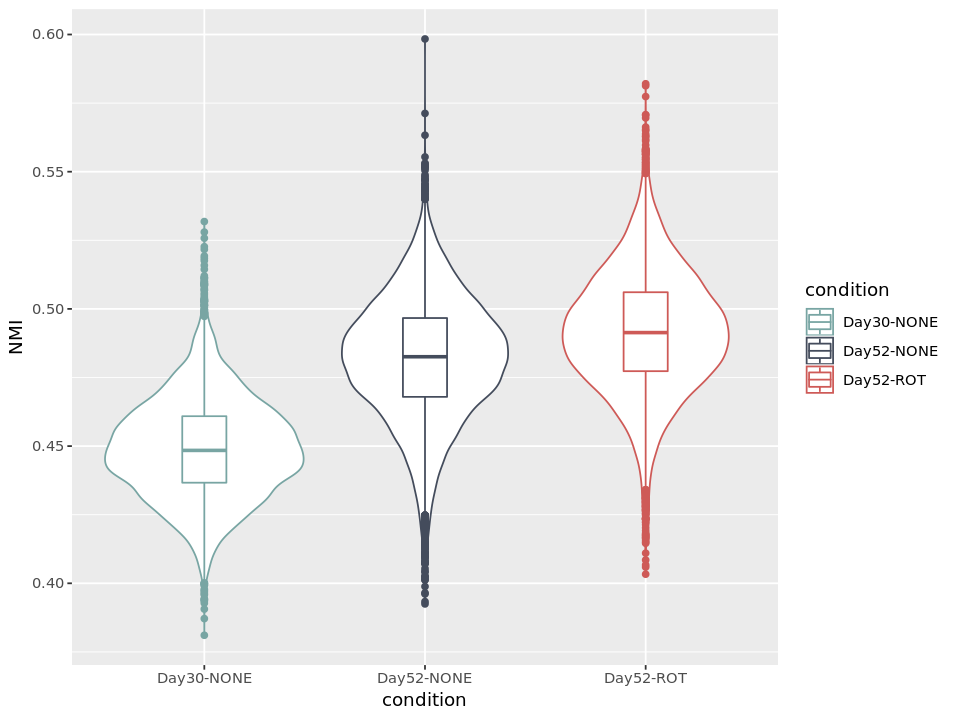

In [63]:
df$condition = paste0(df$time_point,"-",df$treatment)
ggplot(df, aes(x = condition, y = discriminable, colour = condition)) + geom_violin() + 
        scale_colour_manual(values = c(col_D30, col_D52, col_D52_ROT)) +
        geom_boxplot(width = 0.2) + ylab("NMI") 

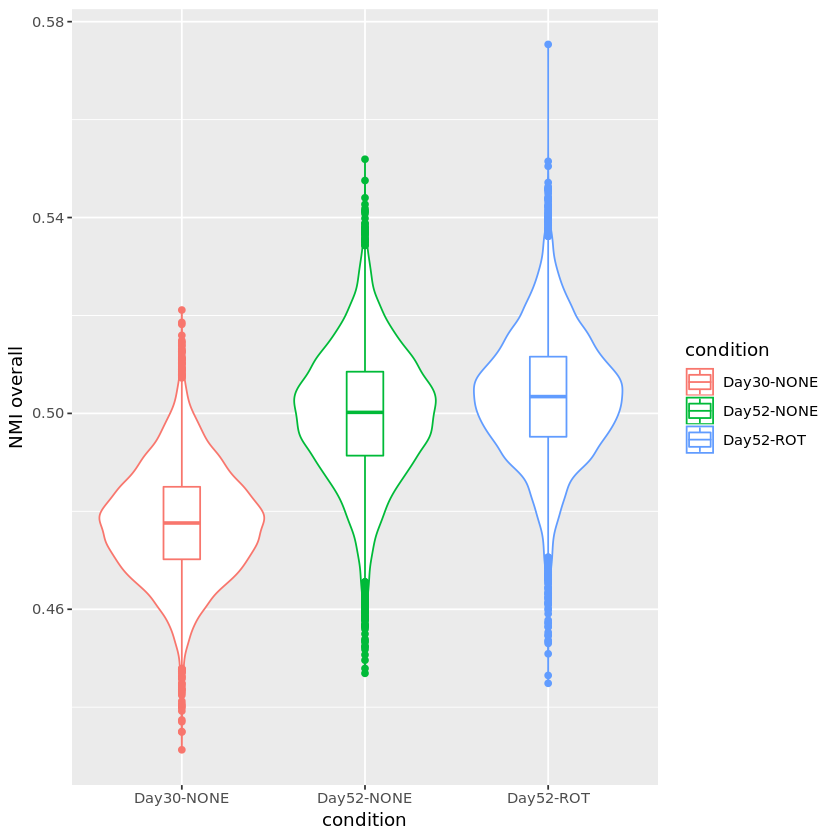

In [51]:
df$condition = paste0(df$time_point,"-",df$treatment)
ggplot(df, aes(x = condition, y = overall, colour = condition)) + geom_violin() + 
        geom_boxplot(width = 0.2) + ylab("NMI overall") 

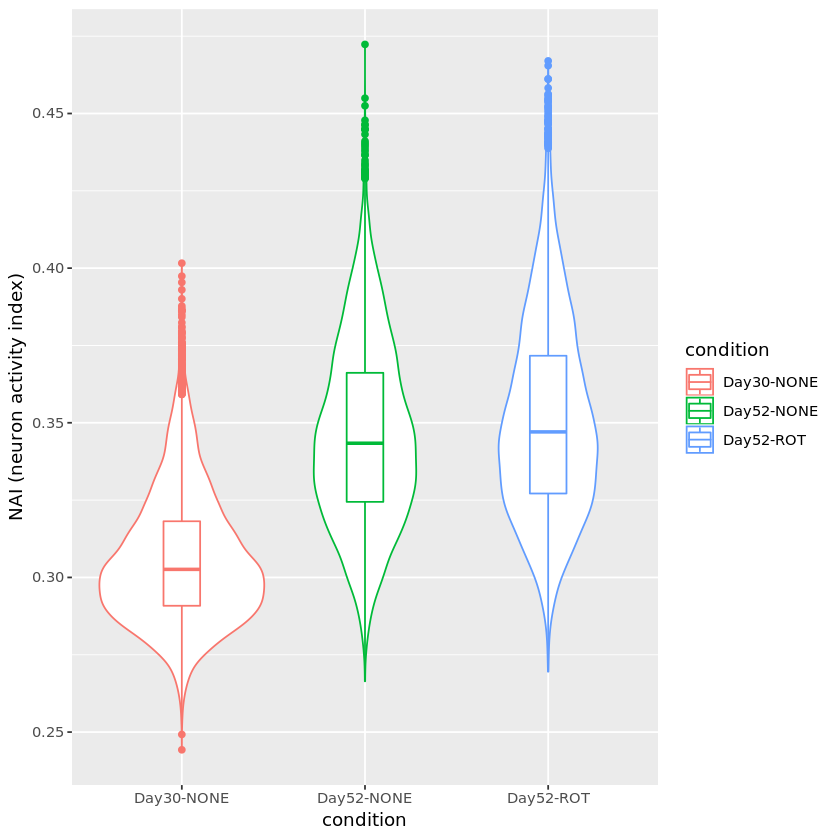

In [52]:
df$condition = paste0(df$time_point,"-",df$treatment)
ggplot(df, aes(x = condition, y = activity, colour = condition)) + geom_violin() + 
        geom_boxplot(width = 0.2) + ylab("NAI (neuron activity index)") 

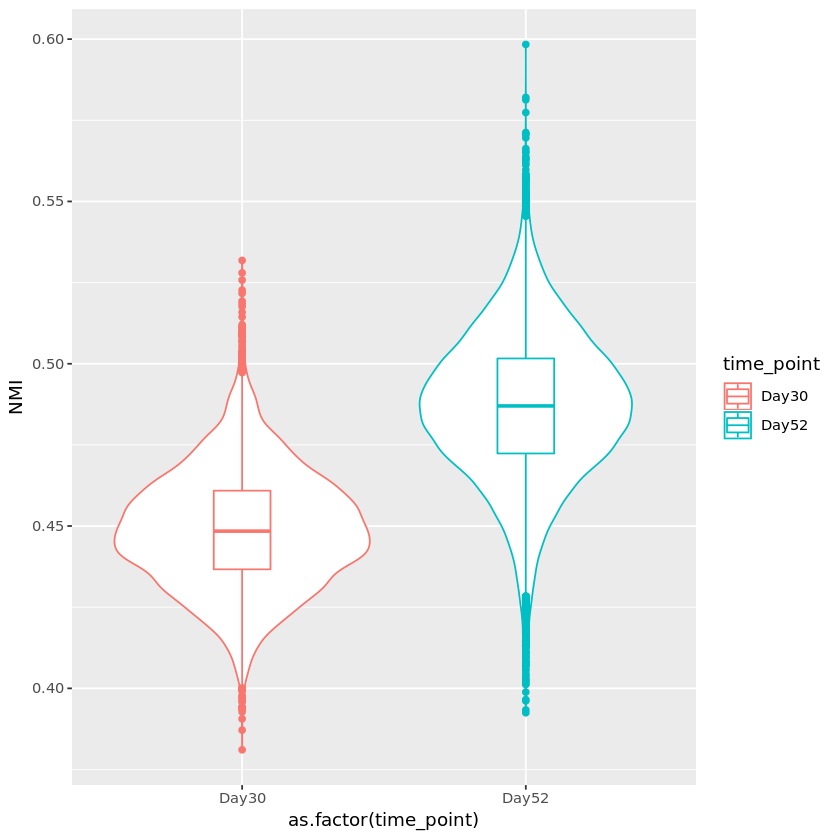

In [53]:
ggplot(df, aes(x = as.factor(time_point), y = discriminable, colour = time_point)) + geom_violin() + 
        geom_boxplot(width = 0.2) + ylab("NMI") 

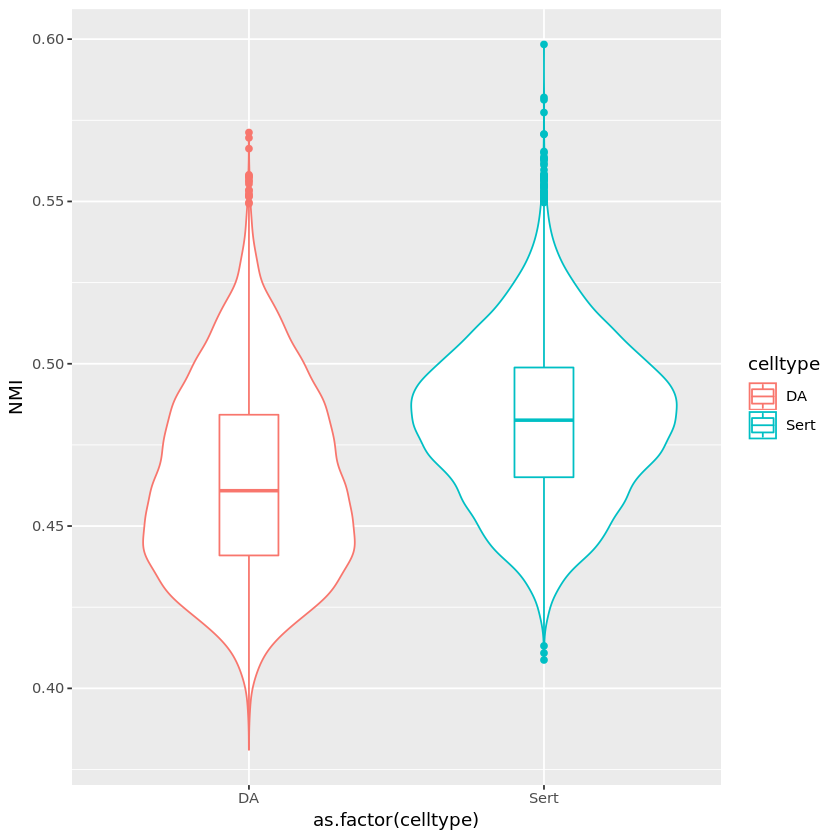

In [55]:
ggplot(df, aes(x = as.factor(celltype), y = discriminable, colour = celltype)) + geom_violin() + 
        geom_boxplot(width = 0.2) + ylab("NMI") 

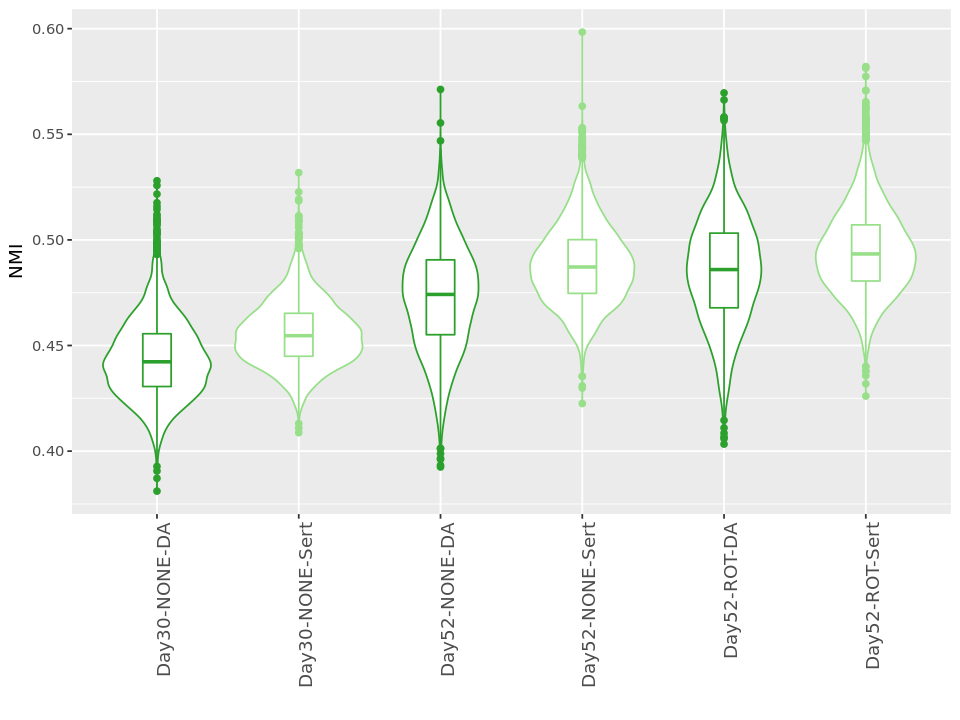

In [61]:
options(repr.plot.width=8, repr.plot.height=6)
df$condition_celltype = paste0(df$condition,"-",df$celltype)
ggplot(df, aes(x = condition_celltype, y = discriminable, colour = condition_celltype)) + geom_violin() + 
        scale_colour_manual(values = c(
                    col_DA,col_Sert,
                    col_DA,col_Sert,
                    col_DA,col_Sert)) +
        geom_boxplot(width = 0.2) + ylab("NMI") + xlab("") +
        theme(legend.position = "none", axis.text.x = element_text(angle = 90, hjust = 1, size = 11)) 

In [25]:
# sce0 = readRDS("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/sce_neurons_d30_subsample_10000cells.Rds")
# sce1 = readRDS("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/sce_neurons_d52_none_subsample_10000cells.Rds")
sce2 = readRDS("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/sce_neurons_d52_rot_subsample_10000cells.Rds")

In [27]:
sce2

class: SingleCellExperiment 
dim: 32738 10000 
metadata(0):
assays(1): counts
rownames(32738): ENSG00000243485 ENSG00000237613 ... ENSG00000215616
  ENSG00000215611
rowData names(0):
colnames(10000): CCTACACAGTACGCCC-1-36 TAGAGCTCAAGCGAGT-1-58 ...
  ACACCGGCAACACGCC-1-55 GACGGCTAGGGAACGG-1-5
colData names(21): index batch ... n_counts_all celltype
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [ ]:
## add cell type (DA and Sert) and time point (here, day30)
## add day 52 (separately untreated and ROT treated)
## plot maturity (boxplots) on the y, stratified by cell type, condition.
## in the paper they use the second column, dNMI